Task 1: Model Building
Bi-variate Plots
We'll visualize the relationship between each independent variable and the dependent variable (Churn).

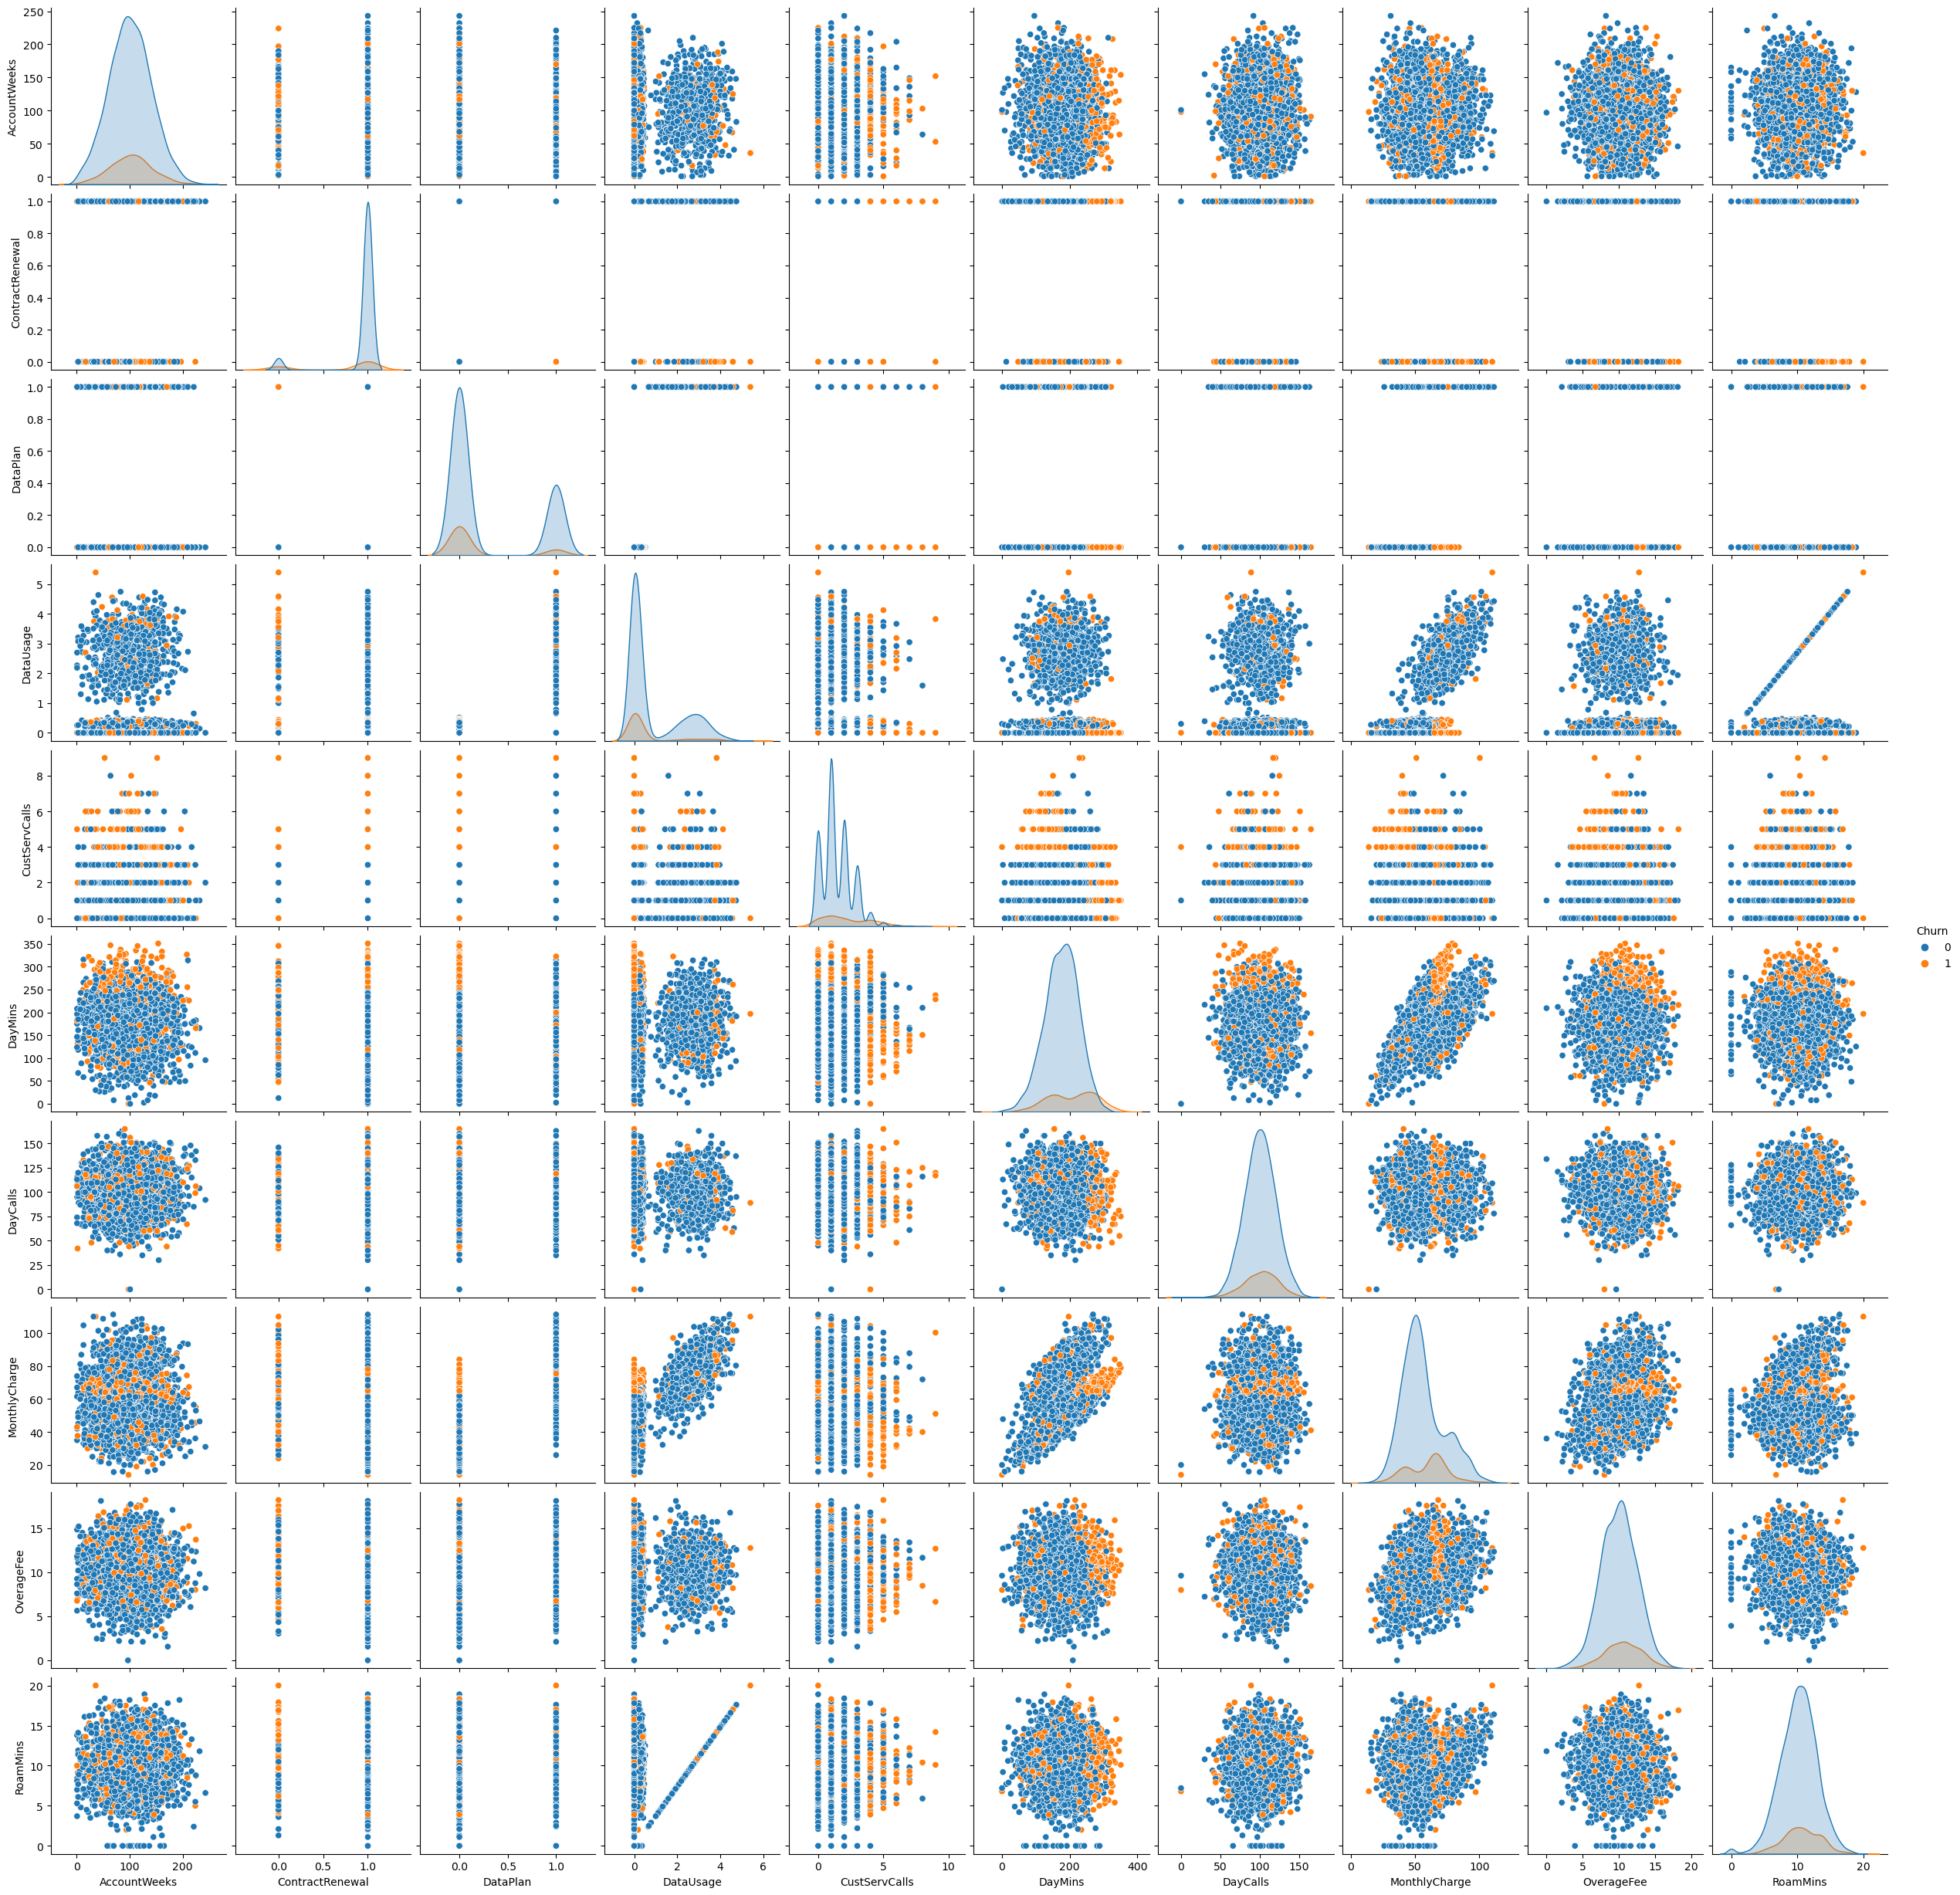

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("F:/Practical+Assignments/Capstone Project/Dataset.csv")

# Bi-variate plots
sns.pairplot(data, hue="Churn", diag_kind="kde")
plt.show()


Final Model Results
We'll use logistic regression as mentioned in the problem statement.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data
X = data.drop(columns=['Churn'])
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Train Accuracy: 0.8574643660915229
Test Accuracy: 0.8470764617691154
Confusion Matrix:
 [[550  16]
 [ 86  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       566
           1       0.48      0.15      0.23       101

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667



C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='sag')  # Example: Increasing max_iter and changing solver
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, solver='sag')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data
X = data.drop(columns=['Churn'])
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model with adjusted parameters
model = LogisticRegression(max_iter=1000, solver='sag')
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Train Accuracy: 0.8615903975993998
Test Accuracy: 0.8590704647676162
Confusion Matrix:
 [[555  11]
 [ 83  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



In [13]:
print(data.columns)


Index(['Churn', 'AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins',
       'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins',
       'ContractRenewal_0', 'ContractRenewal_1', 'DataPlan_0', 'DataPlan_1'],
      dtype='object')


In [22]:
data = pd.get_dummies(data, columns=['ContractRenewal', 'DataPlan'])


KeyError: "None of [Index(['ContractRenewal', 'DataPlan'], dtype='object')] are in the [columns]"

In [24]:
data.rename(columns={'ContractRenewal_0': 'NoContractRenewal',
                     'ContractRenewal_1': 'ContractRenewal',
                     'DataPlan_0': 'NoDataPlan',
                     'DataPlan_1': 'DataPlan'}, inplace=True)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Train Accuracy: 0.859714928732183
Test Accuracy: 0.8590704647676162
Confusion Matrix:
 [[555  11]
 [ 83  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Re-train model with best hyperparameters
best_model = LogisticRegression(max_iter=1000, **best_params)
best_model.fit(X_train, y_train)


C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=0.01, max_iter=1000)

In [27]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with different solver algorithm
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, solver='saga'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Re-train model with best hyperparameters
best_model = LogisticRegression(max_iter=1000, solver='saga', **best_params)
best_model.fit(X_train, y_train)


C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=10, max_iter=1000, solver='saga')

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
class_report_rf = classification_report(y_test, y_pred_test_rf)

print("Train Accuracy (Random Forest):", train_accuracy_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)
print("Classification Report (Random Forest):\n", class_report_rf)


Train Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.9220389805097451
Confusion Matrix (Random Forest):
 [[554  12]
 [ 40  61]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.84      0.60      0.70       101

    accuracy                           0.92       667
   macro avg       0.88      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667



In [29]:
# Feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                Feature  Importance
3               DayMins    0.180190
5         MonthlyCharge    0.177223
2         CustServCalls    0.138151
6            OverageFee    0.100893
7              RoamMins    0.094099
0          AccountWeeks    0.062530
4              DayCalls    0.061265
1             DataUsage    0.056347
9   ContractRenewal_Yes    0.041415
8    ContractRenewal_No    0.037454
10          DataPlan_No    0.027521
11         DataPlan_Yes    0.022912


In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean CV Score (Random Forest):", cv_scores_rf.mean())


Cross-Validation Scores (Random Forest): [0.93820225 0.93245779 0.92682927 0.93058161 0.94371482]
Mean CV Score (Random Forest): 0.9343571473744123


In [31]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Re-train Random Forest model with resampled data
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluate the resampled model
y_pred_test_resampled = rf_model_resampled.predict(X_test)
test_accuracy_resampled = accuracy_score(y_test, y_pred_test_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_test_resampled)
class_report_resampled = classification_report(y_test, y_pred_test_resampled)

print("Test Accuracy (Random Forest with Resampling):", test_accuracy_resampled)
print("Confusion Matrix (Random Forest with Resampling):\n", conf_matrix_resampled)
print("Classification Report (Random Forest with Resampling):\n", class_report_resampled)


Test Accuracy (Random Forest with Resampling): 0.9115442278860569
Confusion Matrix (Random Forest with Resampling):
 [[537  29]
 [ 30  71]]
Classification Report (Random Forest with Resampling):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.71      0.70      0.71       101

    accuracy                           0.91       667
   macro avg       0.83      0.83      0.83       667
weighted avg       0.91      0.91      0.91       667

